#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information.
#### The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()  ## There is no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

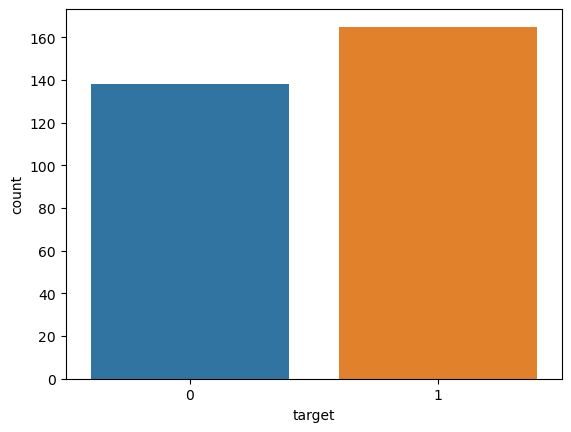

In [9]:
sns.countplot(x=df['target'],data=df)

In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
cat_col=[]
num_col=[]
for i in df.columns:
    if (df[i].nunique()<10):
        cat_col.append(i)
    else:
        num_col.append(i)

In [12]:
cat_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
num_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

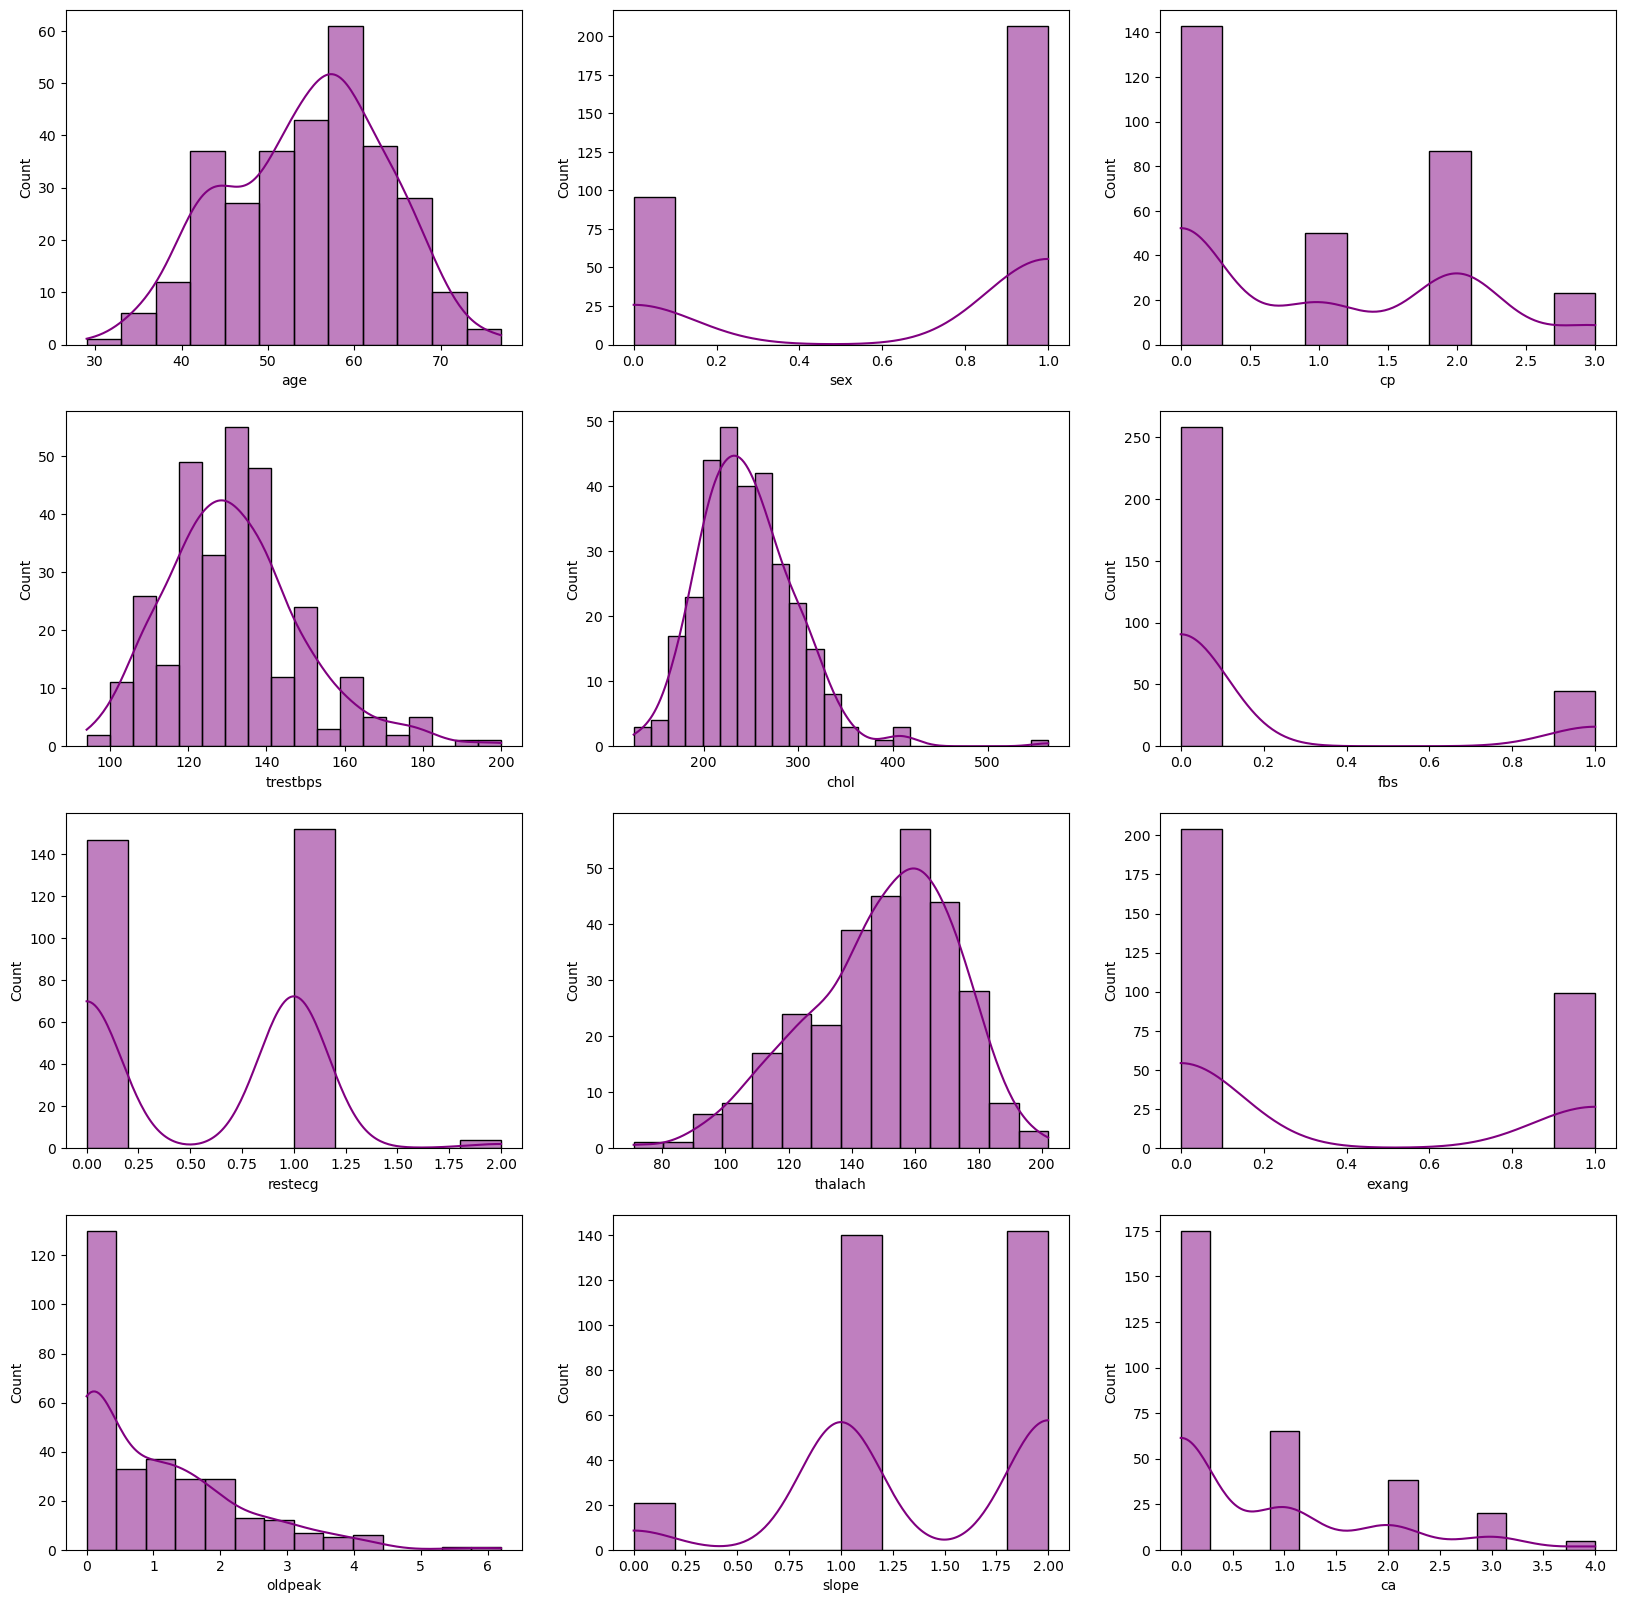

In [14]:
col=list(df.columns)
plt.figure(figsize=(20,20))
for i in range(len(col)-2):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col[i]],kde=True,color='purple')

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
X=df.drop('target',axis=1)
y=df['target']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=45,stratify=y)

In [19]:
X_train.shape

(212, 13)

In [20]:
X_test.shape

(91, 13)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [21]:
RF_model=RandomForestClassifier(n_estimators=100,max_depth=10)

In [22]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [23]:
y_pred=RF_model.predict(X_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Accuracy Score: 0.7912087912087912

Confusion Matrix 
 [[27 14]
 [ 5 45]]

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.66      0.74        41
           1       0.76      0.90      0.83        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [24]:
RF_model.feature_importances_

array([0.05952688, 0.02470532, 0.17475938, 0.07129908, 0.07137392,
       0.00911044, 0.02609561, 0.14625156, 0.08554702, 0.11218867,
       0.03467547, 0.09613306, 0.0883336 ])

In [25]:
RF_model.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

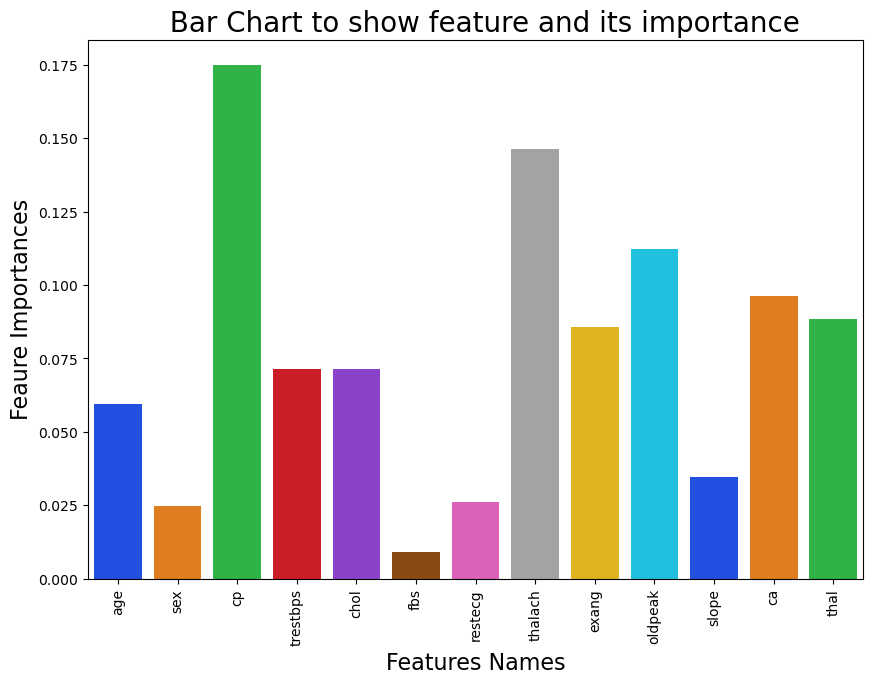

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(y=RF_model.feature_importances_,x=RF_model.feature_names_in_,palette='bright')
plt.title("  Bar Chart to show feature and its importance",size=20)
plt.xlabel("Features Names",size=16)
plt.ylabel("Feaure Importances",size=16)
plt.xticks(rotation=90)
plt.show()

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [27]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [28]:
parameter={'n_estimators':[100,200,300],'max_depth':[2,3,5,10],'min_samples_split':[2,3],'min_samples_leaf':[1,2,3]}

In [29]:
grid_param=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameter,cv=5,return_train_score=True)

In [30]:
grid_param.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [31]:
grid_param.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [32]:
grid_param.best_score_

0.8444075304540422

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [33]:
RF_model=RandomForestClassifier(max_depth=5,
 min_samples_leaf=1,
 min_samples_split= 2,
 n_estimators= 100)

In [34]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [35]:
y_pred=RF_model.predict(X_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Accuracy Score: 0.8021978021978022

Confusion Matrix 
 [[26 15]
 [ 3 47]]

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.63      0.74        41
           1       0.76      0.94      0.84        50

    accuracy                           0.80        91
   macro avg       0.83      0.79      0.79        91
weighted avg       0.82      0.80      0.80        91



In [36]:
RF_model.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [37]:
RF_model.feature_importances_

array([0.05028701, 0.0310736 , 0.19356693, 0.05627377, 0.05384559,
       0.00739983, 0.02257353, 0.13279388, 0.10371974, 0.11330867,
       0.04031024, 0.08926277, 0.10558444])

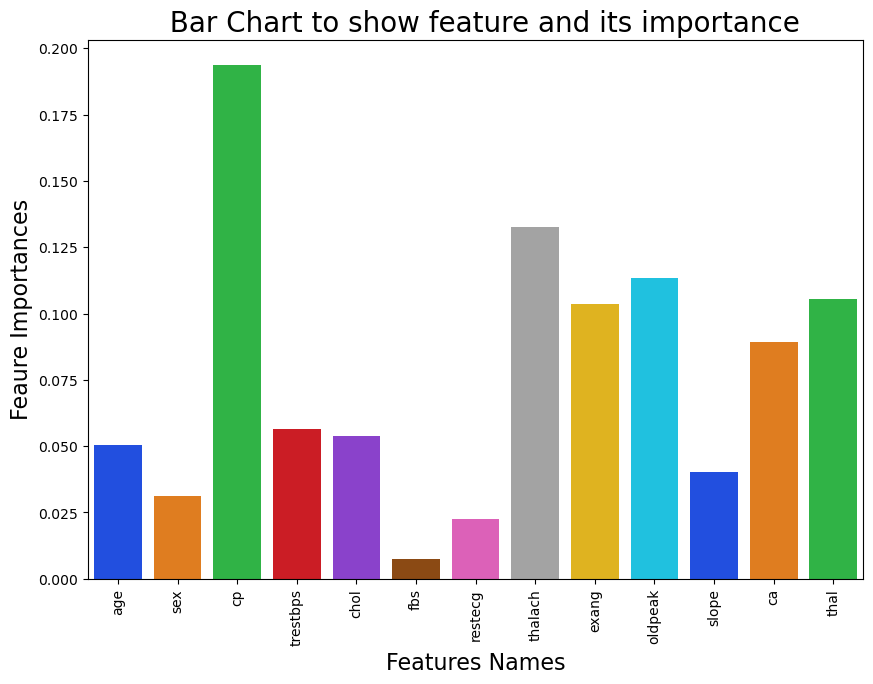

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(y=RF_model.feature_importances_,x=RF_model.feature_names_in_,palette='bright')
plt.title("  Bar Chart to show feature and its importance",size=20)
plt.xlabel("Features Names",size=16)
plt.ylabel("Feaure Importances",size=16)
plt.xticks(rotation=90)
plt.show()

In [39]:
## Clearly Hyperparameter tuning with above value has good overall performance

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [40]:
#pip install mlxtend

In [41]:
from mlxtend.plotting import plot_decision_regions

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
x=X_train[['cp','thalach']]
y=y_train

In [44]:
RF_model=RandomForestClassifier()

In [45]:
RF_model.fit(x,y)

RandomForestClassifier()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


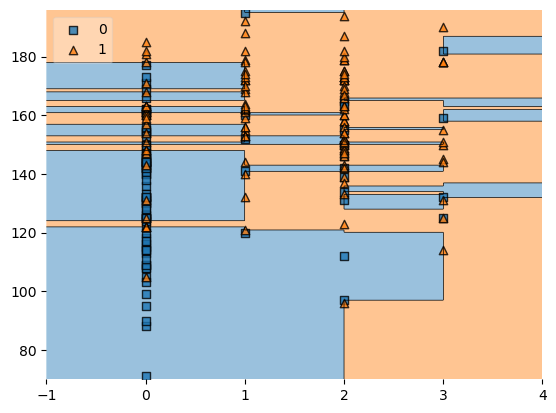

In [46]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=RF_model,legend=2)
plt.show()